In [46]:
#import libs (copy& pastefrom EDA file))
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [47]:
df = pd.read_csv('/Users/ina/Documents/spicedAcademy/ds-eda-project/data/20250618_King_county_house_sales_ks_JOIN.csv')

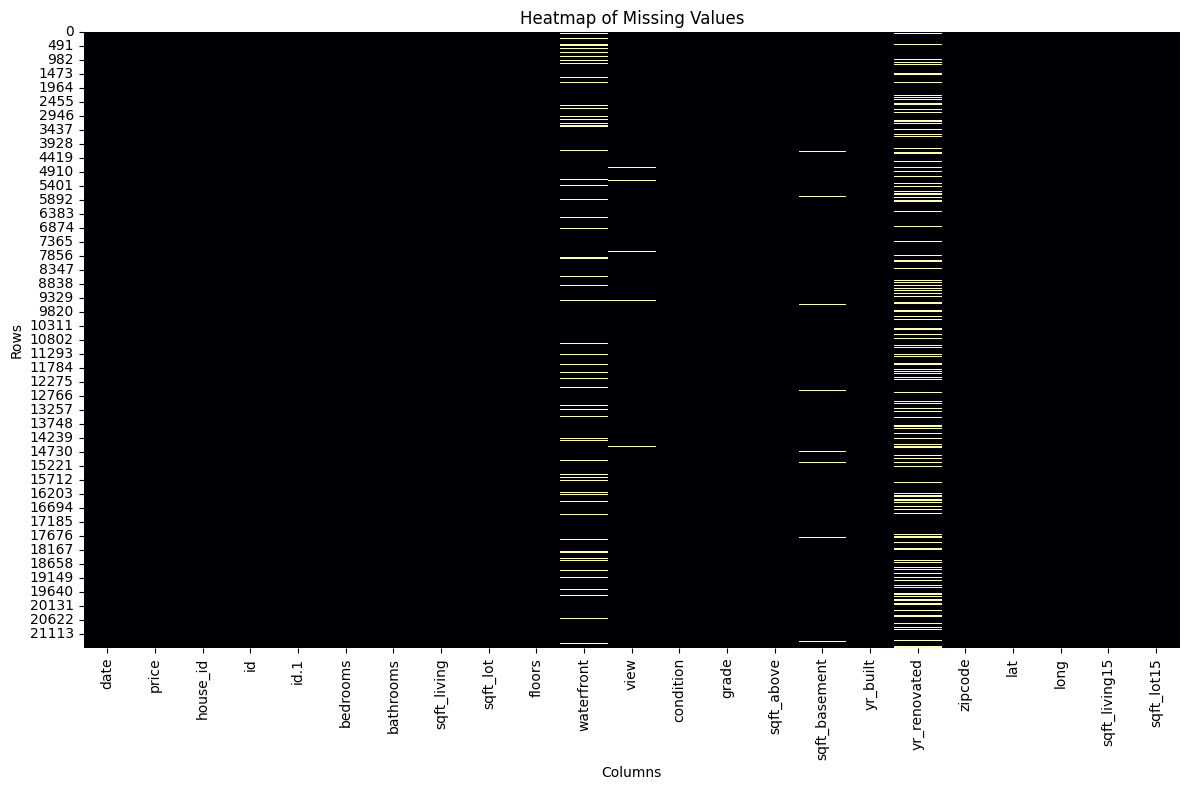

In [ ]:
missing_mask = df.isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(missing_mask, cbar=False, cmap='inferno')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

In [50]:
#fill nans wirh 0, so like no waterfront
#so basically since all the nans were in categorical columns, I filled those with "0", which is defined as "NO"
df.fillna({  
    'waterfront': 0,
    'view': 0,
    'sqft_basement': 0,
    'yr_renovated': 0
}, inplace=True) #overring

In [51]:
#changed date format of 'date'
df['date'] = pd.to_datetime(df['date'])

In [52]:
#changed 'yr_renovated' from float to int
df['yr_renovated'] = (df['yr_renovated'] // 10).astype(int)

In [39]:
df.isnull().sum()

date             0
price            0
house_id         0
id               0
id.1             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

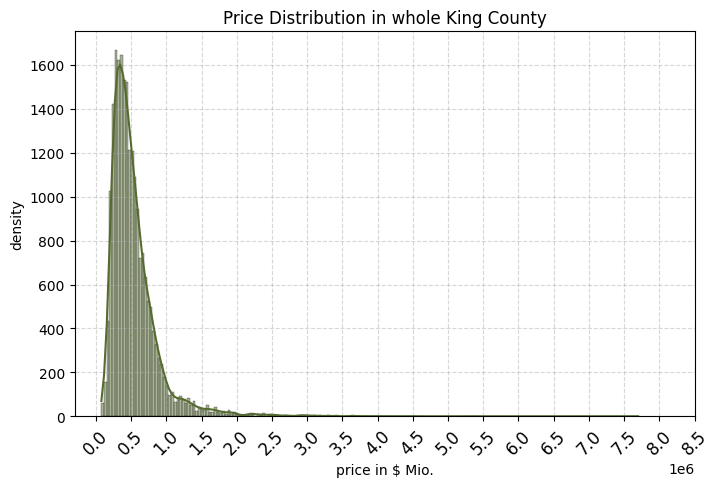

In [53]:
#price distribution in whole King County
#df = df[df['price'] < 2_500_000] #cutting outliers
price_dist_plot = sns.histplot(df['price'], bins=200, color='darkolivegreen', kde=True)
plt.title('Price Distribution in whole King County')
plt.xlabel('price in $ Mio.')
plt.ylabel('density')
#suggested by copilot
#plt.xlim(0, 5_500_000)
plt.xticks(np.arange(0, 8_500_001, 500_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show(price_dist_plot)


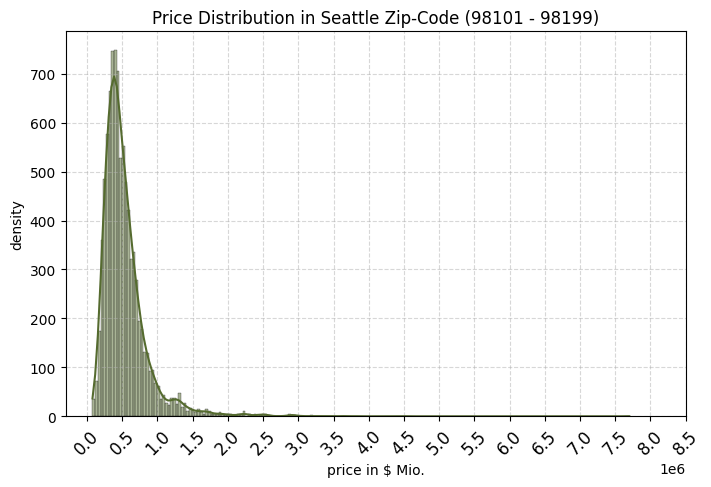

In [54]:
#since the customer wanted to live in a lively and central ares; I googled what is center of population in King County. Result: Mercer Island with zipcode 98040
#I will now compare the price distribution of this area with the whole King County 
# Filter for zipcodes between 98101 and 98199 (inclusive)
df_central = df[(df['zipcode'] >= 98101) & (df['zipcode'] <= 98199)]
sns.histplot(df_central['price'], bins=200, color='darkolivegreen', kde=True)
plt.title('Price Distribution in Seattle Zip-Code (98101 - 98199)')
plt.xlabel('price in $ Mio.')
plt.ylabel('density')
#plt.xlim(0, 5_500_000)
plt.xticks(np.arange(0, 8_500_001, 500_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()  

In [42]:
df_central.shape

(8973, 23)

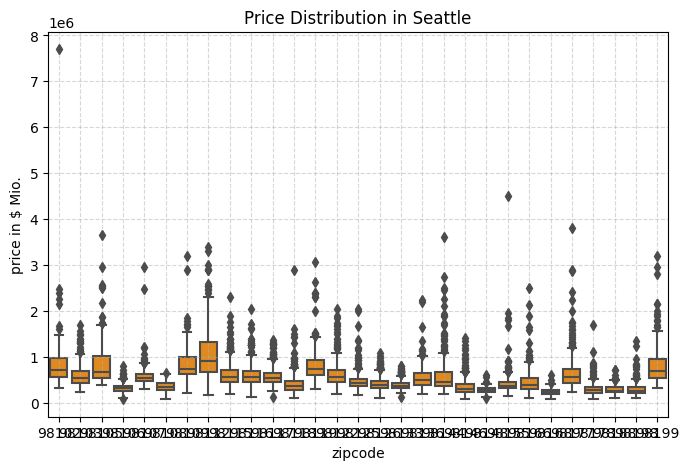

In [57]:
sns.boxplot(x=df_central['zipcode'], y=df_central['price'], color='darkorange')

plt.title('Price Distribution in Seattle')
plt.xlabel('zipcode')
plt.ylabel('price in $ Mio.')
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

In [ ]:
df_central['price'].describe()
'''count      8973.000
mean     535085.600
std      340518.631
min       78000.000
25%      337000.000
50%      453000.000
75%      630000.000
max     7700000.000'''

count      8973.000
mean     535085.600
std      340518.631
min       78000.000
25%      337000.000
50%      453000.000
75%      630000.000
max     7700000.000
Name: price, dtype: float64

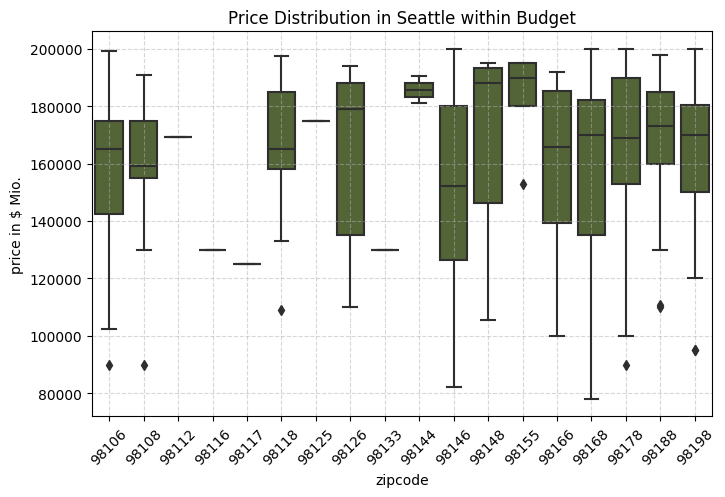

In [69]:
# Filter prices below 2,500,000 for the boxplot
df_inbudget = df_central[df_central['price'] < 2_00_000]
a = sns.boxplot(x=df_inbudget['zipcode'], y=df_inbudget['price'], color='darkolivegreen')
plt.title('Price Distribution in Seattle within Budget')
plt.xlabel('zipcode')
plt.ylabel('price in $ Mio.')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()


In [76]:
df_central['price'].describe()

count      8973.000
mean     535085.600
std      340518.631
min       78000.000
25%      337000.000
50%      453000.000
75%      630000.000
max     7700000.000
Name: price, dtype: float64

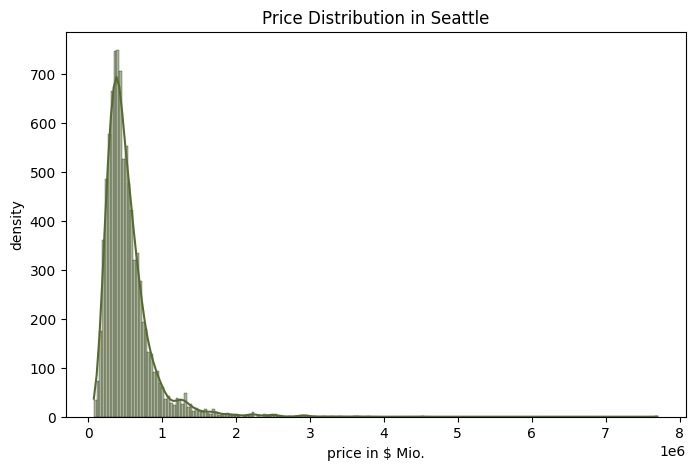

In [75]:
# trying to find out "midprice"
# df_center = df_price_in_mercer[df_price_in_mercer['price'] < 2_500_000] #cutting outliers
price_dist_plot2 = sns.histplot(df_central['price'], bins=200, color='darkolivegreen', kde=True)
plt.title('Price Distribution in Seattle')
plt.xlabel('price in $ Mio.')
plt.ylabel('density')
plt.show()

In [82]:
#df_price_in_mercer = df[df['zipcode'] == 98040] #filtering for zipcode 98040
#df_price_in_mercer_cleaned = df_price_in_mercer[df_price_in_mercer['price'] < 2_100_000] #cutting outliers
continous_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors'] #histoplots of continous vars
categoric_vars = ['condition', 'grade', 'waterfront', 'view', 'zipcode', 'yr_built', 'yr_renovated'] #histoplots of categorical vars

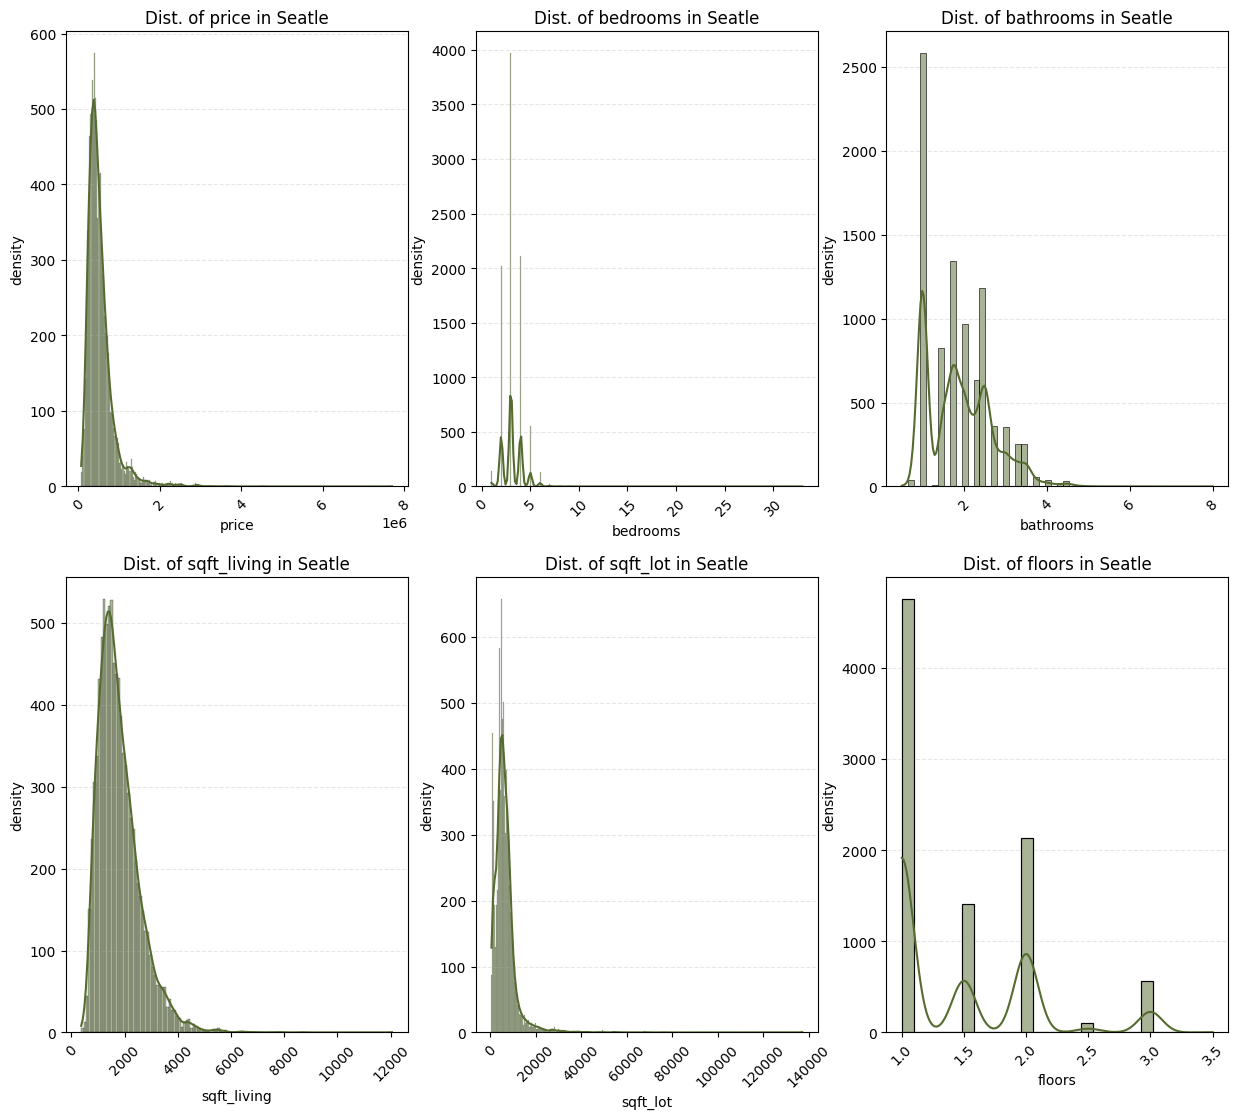

In [80]:
#df_price_in_mercer = df[df['zipcode'] == 98040] #filtering for zipcode 98040
#df_price_in_mercer_cleaned = df_price_in_mercer[df_price_in_mercer['price'] < 2_100_000] #cutting outliers

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 13))

for ax, column in zip(axes.flatten(), continous_vars):
    sns.histplot(x=column, data=df_central, ax=ax, color='darkolivegreen', kde=True)
    ax.set_title(f'Dist. of {column} in Seatle', fontsize=12)
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('density', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    #ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

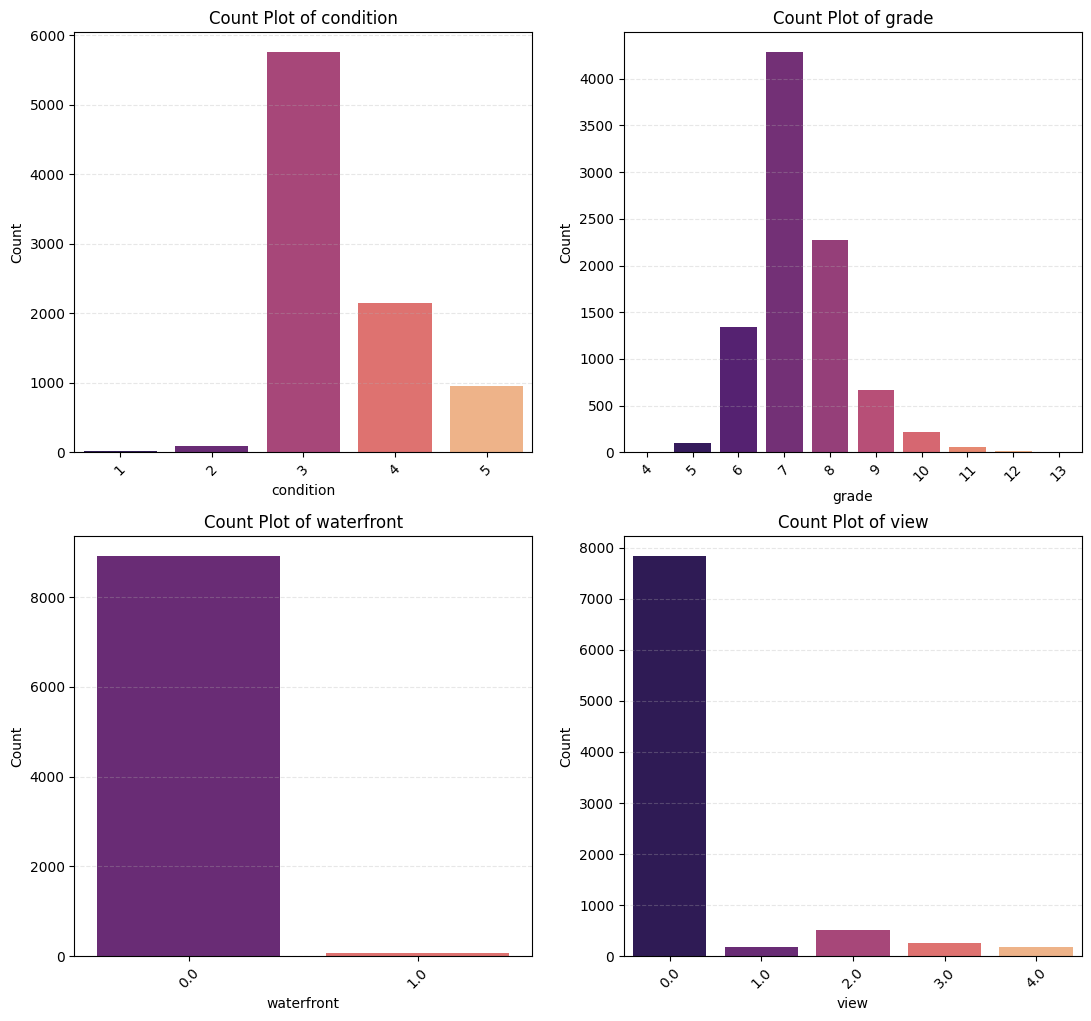

In [87]:
categoric_vars = ['condition', 'grade', 'waterfront', 'view', 'zipcode', 'yr_built', 'yr_renovated'] #histoplots of categorical vars
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 12))

for ax, column in zip(axes.flatten(), categoric_vars):
    sns.countplot(x=column, data=df_central, palette='magma', ax=ax) #palette magma can be found in https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    #ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [85]:
#Preisrange von 822 000 bis 1.387.500
#Median 993.750

#how many hosue are in budgeet
houses_in_budget = df_central[df_central['price'].between(453000, 2000000)]

In [86]:
houses_in_budget.value_counts()

date        price        house_id    id     id.1        bedrooms  bathrooms  sqft_living  sqft_lot   floors  waterfront  view   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat     long      sqft_living15  sqft_lot15
2014-05-02  463000.000   7739100015  3720   7739100015  3.000     1.750      1710.000     7320.000   1.000   0.000       0.000  3          7      1710.000    0.000          1948      0             98155    47.751  -122.281  2260.000       8839.000      1
2014-12-30  640000.000   2768000400  38     2768000400  4.000     2.000      2360.000     6000.000   2.000   0.000       0.000  4          8      2360.000    0.000          1904      0             98107    47.670  -122.362  1730.000       4700.000      1
2014-12-31  582000.000   2493200215  8387   2493200215  3.000     1.750      1820.000     3140.000   2.000   0.000       0.000  5          8      1820.000    0.000          1949      1990          98136    47.527  -122.384  2030.000       5

In [104]:

offer_list_nj = houses_in_budget[
    (houses_in_budget['price'].between(453000, 2000000)) &
    (houses_in_budget['grade'] >= 9) &
    (houses_in_budget['bedrooms'] >= 4) &
    (houses_in_budget['bathrooms'] >= 2) &
    (houses_in_budget['sqft_living'] >= 3000) &
    (houses_in_budget['sqft_lot'] >= 10000) &
    (houses_in_budget['floors'] >= 2) &
    (houses_in_budget['waterfront'] >= 0) &
    (houses_in_budget['view'] >= 1)]


In [105]:
offer_list_nj = offer_list_nj.sort_values(by='price', ascending=True)
offer_list_nj.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1929,2015-02-11,598800.000,5379804150,1930,5379804150,6.000,4.000,4470.000,17877.000,3.000,...,9,3230.000,1240.000,2013,0,98188,47.451,-122.273,1790.000,18260.000
11933,2014-06-24,600000.000,8128600060,11934,8128600060,4.000,3.250,4690.000,14930.000,2.000,...,10,3680.000,1010.000,1995,0,98155,47.772,-122.283,2910.000,13320.000
10738,2015-05-08,699950.000,6119700030,10739,6119700030,4.000,3.250,3674.000,12793.000,2.000,...,9,3674.000,0.000,1987,0,98166,47.436,-122.343,3220.000,13100.000
10607,2014-12-01,799000.000,3222049159,10608,3222049159,4.000,3.500,3290.000,20107.000,2.000,...,10,2220.000,1070.000,1990,0,98198,47.355,-122.319,2990.000,16988.000
4020,2014-10-07,800000.000,9175600025,4021,9175600025,7.000,6.750,7480.000,41664.000,2.000,...,11,5080.000,2400.000,1953,0,98166,47.464,-122.368,2810.000,33190.000


In [119]:
# Create a concise overview table for the customer with key columns
overview_cols = ['house_id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'zipcode', 'yr_built', 'grade', 'view', 'waterfront']
customer_overview = options_for_customer[overview_cols].copy()

# Format price as integer for readability
customer_overview['price'] = customer_overview['price'].astype(int)

customer_overview.reset_index(drop=True, inplace=True)
customer_overview

,house_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,yr_built,grade,view,waterfront
0,5379804150,598800,6.000,4.000,4470.000,17877.000,98188,2013,9,3.000,0.000
1,7631800025,1040000,4.000,3.250,3450.000,11240.000,98166,1960,10,3.000,0.000
2,9412400185,1310000,4.000,4.500,4750.000,13912.000,98118,2005,10,2.000,0.000


In [106]:
offer_list_nj.to_csv('/Users/ina/Documents/spicedAcademy/ds-eda-project/data/offer_list_nj1.csv', index=False)

In [123]:
options_for_customer = df_central[df_central['house_id'].isin([5379804150, 7631800025, 9412400185])]

overview_cols = ['house_id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'zipcode', 'yr_built', 'grade', 'view', 'waterfront', 'yr_built', 'yr_renovated']
customer_overview = options_for_customer[overview_cols].copy()

# Format price as integer for readability
customer_overview['price'] = customer_overview['price'].astype(int)

customer_overview.reset_index(drop=True, inplace=True)
customer_overview

,house_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,zipcode,yr_built,grade,view,waterfront,yr_built,yr_renovated
0,5379804150,598800,6.000,4.000,4470.000,17877.000,98188,2013,9,3.000,0.000,2013,0
1,7631800025,1040000,4.000,3.250,3450.000,11240.000,98166,1960,10,3.000,0.000,1960,2001
2,9412400185,1310000,4.000,4.500,4750.000,13912.000,98118,2005,10,2.000,0.000,2005,0


In [118]:
options_for_customer.to_excel('/Users/ina/Documents/spicedAcademy/ds-eda-project/data/options_for_customer1.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'

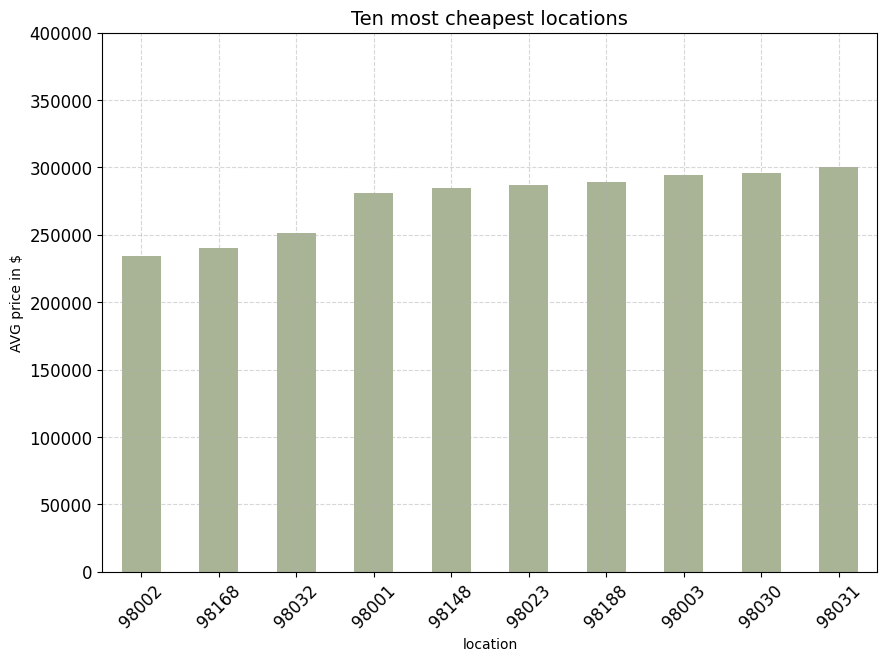

In [ ]:
#avg pro zip - CHEAPEST LOCATIONS ONE MORE TIME
mean_price_per_zp = df2.groupby('zipcode')['price'].mean()

#cheapest zips
cheapest10 = mean_price_per_zp.nsmallest(10)

#plotten
plt.figure(figsize=(10, 7))
cheapest10.plot(kind='bar', color='darkolivegreen', alpha=0.5)

#visuals
    #title
plt.title('Ten most cheapest locations', fontsize=14)
    #x-label
plt.xlabel('location')
plt.xticks(rotation=45, fontsize=12)
    #y-label
plt.ylabel('AVG price in $')
plt.yticks(np.arange(0, 400_001, 50_000), fontsize=12)
plt.ylim(0, 400_000)
    #backround
#plt.gca().set_facecolor('white', alpha=0.8) #here the background color is set to white with 80% opacity
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

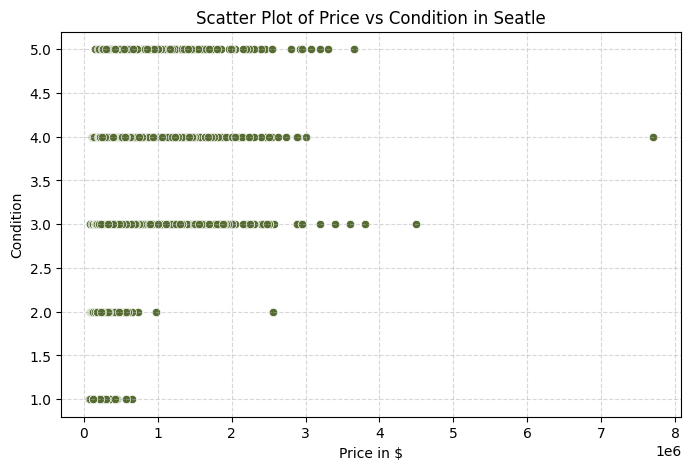

In [94]:
#CONDTION INFLUNCE ON PRICE

sns.scatterplot(x='price', y='condition', data=df_central, color='darkolivegreen')
plt.title('Scatter Plot of Price vs Condition in Seatle')
plt.xlabel('Price in $')
plt.ylabel('Condition')
#plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

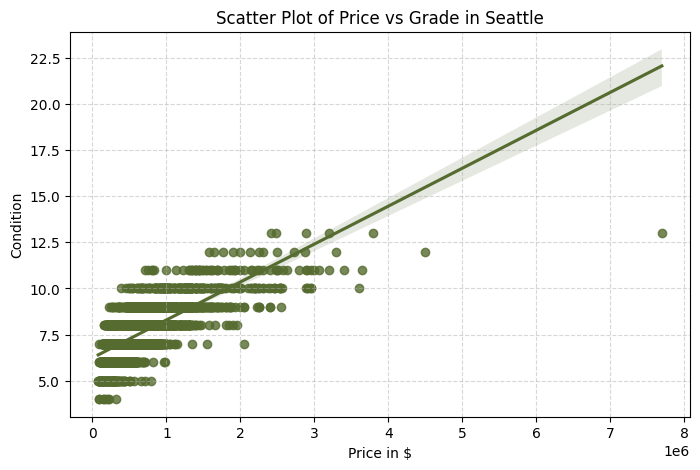

In [96]:
#GRADE INFLUNCE ON PRICE
sns.regplot(x='price', y='grade', data=df_central, color='darkolivegreen')
plt.title('Scatter Plot of Price vs Grade in Seattle')
plt.xlabel('Price in $')
plt.ylabel('Condition')
#plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

In [98]:
sns.regplot(x='price', y='df_central.columns', data=df_central, color='darkolivegreen')
plt.title('Scatter Plot of Price vs Footage in Seattle')
plt.xlabel('Price in $')
plt.ylabel('Ft sq')
#plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()

KeyError: 'df_central.columns'

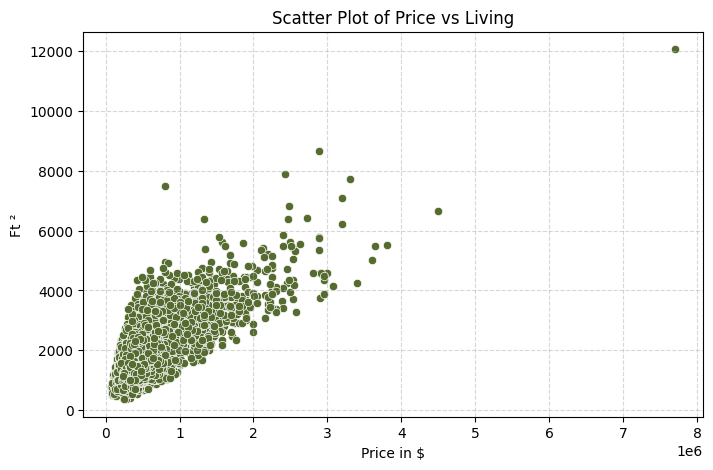

In [103]:
sns.scatterplot(x='price', y='sqft_living', data=df_central, color='darkolivegreen')
plt.title('Scatter Plot of Price vs Living')
plt.xlabel('Price in $')
plt.ylabel('Ft ²')
#plt.xticks(np.arange(0, 2_500_001, 250_000), rotation=45, fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5) #grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.5) #grid vertical
plt.show()